In [106]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch
import numpy as np
import torchvision as tv

plt.rcParams['figure.figsize'] = [20, 10]

script_dir = os.path.dirname('__file__')
sys.path.append(os.path.join(script_dir, '..', 'src'))

import data_handler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
train_data, _, _ = data_handler.setup_data(hparams={'path': os.path.expanduser(os.path.join('~', 'share-all', 'derma-data', 'archive')), 't': ""})

Trainig transforms: None


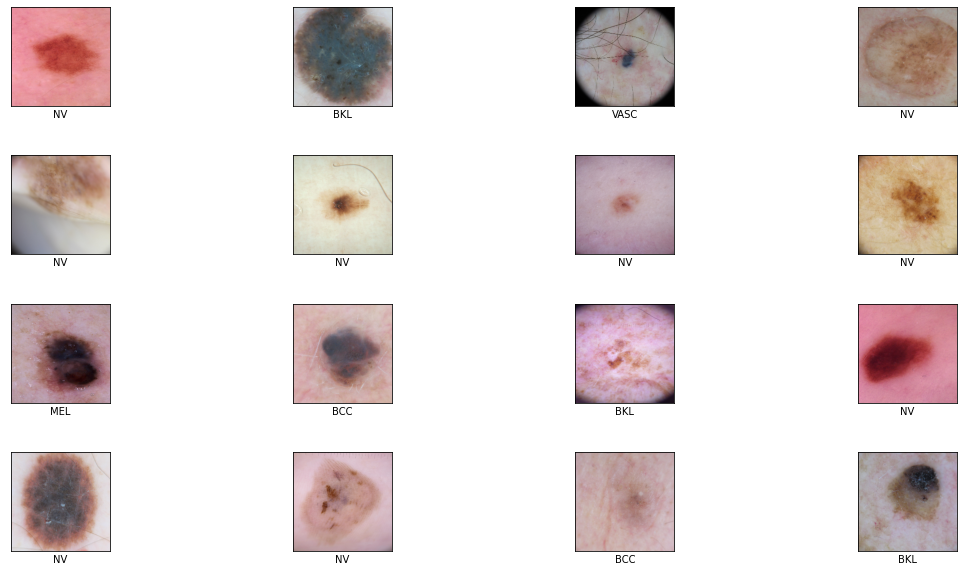

In [118]:
# Show 16 images:
f, ax = plt.subplots(4, 4)
f.subplots_adjust(hspace=0.5, wspace= 0.05)
for i in range(0, 4):
    for j in range(0, 4):
        ax[i, j].imshow(train_data[i * 4 + j][0].transpose(0,2).numpy())
        ax[i,j].yaxis.set_visible(False)
        # ax[i,j].xaxis.set_visible(False)
        ax[i,j].set_xlabel(train_data.idx_to_class[train_data[4*i + j][1]])
        ax[i,j].xaxis.set_ticklabels([])
        ax[i,j].xaxis.set_ticklabels([])
        ax[i,j].xaxis.set_ticks([])

In [109]:
train_data[0][0].min()

tensor(0.0455)

In [ ]:
train_data, _, _ = data_handler.setup_data(hparams={'path': os.path.expanduser(os.path.join('~', 'share-all', 'derma-data', 'archive')), 't': ""})

Trainig transforms: None


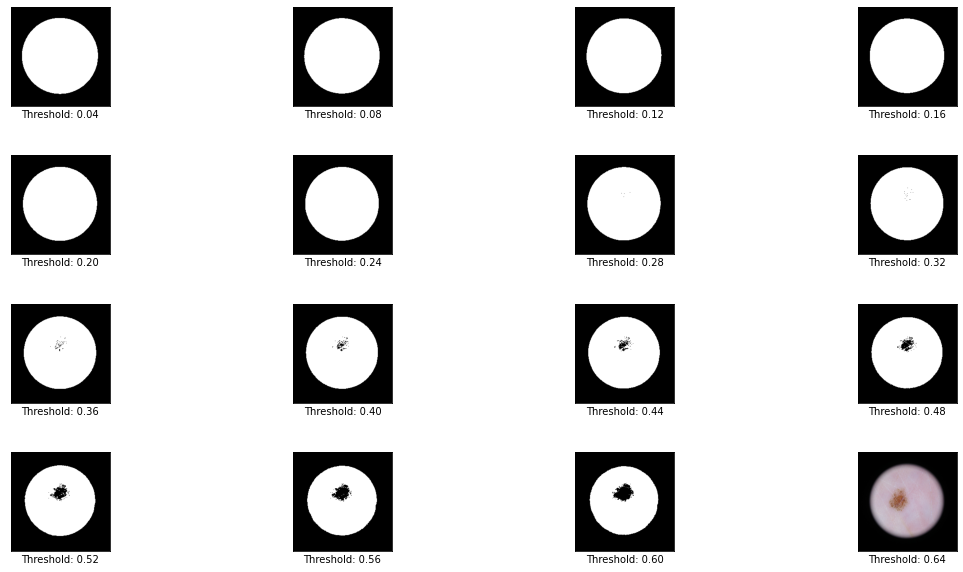

In [123]:
train_data, _, _ = data_handler.setup_data(hparams={'path': os.path.expanduser(os.path.join('~', 'share-all', 'derma-data', 'archive')), 't': ""})
img = None
for k in range(0,100):
    if (train_data[k][0].min() < 0.005):
        img = k
        f, ax = plt.subplots(4, 4)
        f.subplots_adjust(hspace=0.5, wspace= 0.05)
        for i in range(0, 4):
            for j in range(0, 4):
                threshold = 0.04 * (i * 4 + j) + 0.04
                grey_img = (torch.sum(train_data[k][0], dim=0) / 3)
                ax[i, j].imshow((1.0 * (grey_img >= threshold)).numpy(), cmap="gray")
                ax[i,j].yaxis.set_visible(False)
                # ax[i,j].xaxis.set_visible(False)
                ax[i,j].set_xlabel(f"Threshold: {threshold:.2f}")
                ax[i,j].xaxis.set_ticklabels([])
                ax[i,j].xaxis.set_ticklabels([])
                ax[i,j].xaxis.set_ticks([])
        break   # Search for the first image with a black border

plt.imshow(train_data[k][0].transpose(0,2).numpy(), cmap="gray")

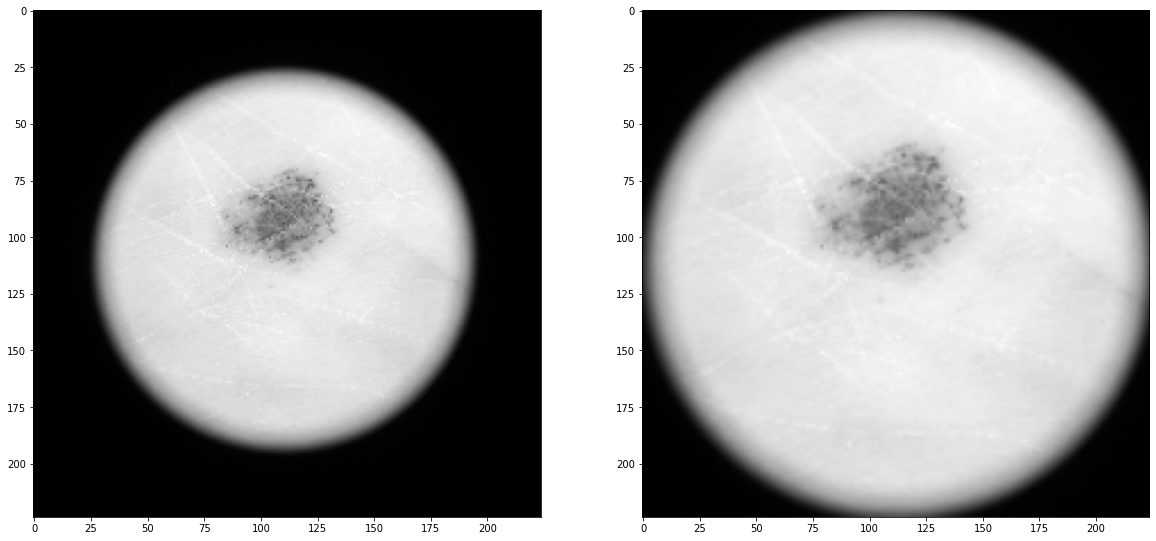

In [146]:
train_data[img][0].shape
grey_img = (torch.sum(train_data[img][0], dim=0) / 3)
blwh_img = (1.0 * (grey_img >= 0.12)).numpy()
#plt.imshow(blwh_img, cmap='gray')
cov_m = np.cov(blwh_img)
eig_values, eig_vectors = np.linalg.eig(cov_m)
test = ((cov_m) > 0.001)
coor = np.unravel_index(np.argmax(test),test.shape)
box_idx = np.argwhere(test>0)
outer_points = np.argmax(box_idx, axis=0)
height= np.abs(box_idx[outer_points[0],0] - box_idx[outer_points[0],1])
width = np.abs(box_idx[outer_points[1],0] - box_idx[outer_points[1],1])
cropped_img = tv.transforms.functional.resized_crop(grey_img[None,:], top=box_idx[0,0], left=box_idx[0,1], 
                                                            height= height, 
                                                            width= width, size=224)
f, ax = plt.subplots(1, 2)
ax[0].imshow(grey_img, cmap='gray')
ax[1].imshow(cropped_img[0], cmap='gray')